In [1]:
#Run the code below
import re
import requests
import random
import json
import math

from random import randint
from time import sleep

from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from tqdm import tqdm

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

from sklearn.model_selection import train_test_split

In [2]:
df_who = pd.read_csv("master.csv", sep=",")

In [3]:
df_who.head

<bound method NDFrame.head of           country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
0               

# Data altering

The cells below alter the data in order to use it for a neural network + a bit of

In [4]:
def suicide_check(number):
    if number < 3:
        return 0
    elif number < 20:
        return 1
    elif number < 50:
        return 2
    return 3

In [5]:
# Make copy of existing data set
df_copy = df_who.copy()

# Make the dependant variable one hot encoded
df_copy['suicides/100k pop'] = df_copy['suicides/100k pop'].map(suicide_check)

df_copy = df_copy.rename(columns={'suicides/100k pop': 'suicides',' gdp_for_year ($) ': 'gdp_year', 'gdp_per_capita ($)' : 'gdp_per_capita', 'HDI for year':'HDI'})

In [6]:
print(max(df_who['suicides/100k pop']))
print(np.median(df_who['suicides/100k pop']))
print(min(df_who['suicides/100k pop']))

224.97
5.99
0.0


### Cell with data with economic factors.

In [7]:
# Make target and outcome values
y, X = dmatrices('suicides ~ gdp_year + age + sex + generation + country + year', data=df_copy, return_type='dataframe')
x_train,x_test ,y_train, y_test = train_test_split(X,y, shuffle=True)
clf = MLPClassifier(max_iter=1000).fit(x_train, y_train.values.ravel())
clf.score(x_test, y_test)

0.7767074047447879

### Cell with data without economic factors.

In [8]:
# Make target and outcome values
y, X = dmatrices('suicides ~ age + sex + generation + country + year', data=df_copy, return_type='dataframe')
x_train,x_test ,y_train, y_test = train_test_split(X,y, shuffle=True)
clf2 = MLPClassifier(max_iter=1000).fit(x_train, y_train.values.ravel())
clf2.score(x_test, y_test)

0.7600287562904385

# Dataset analysis

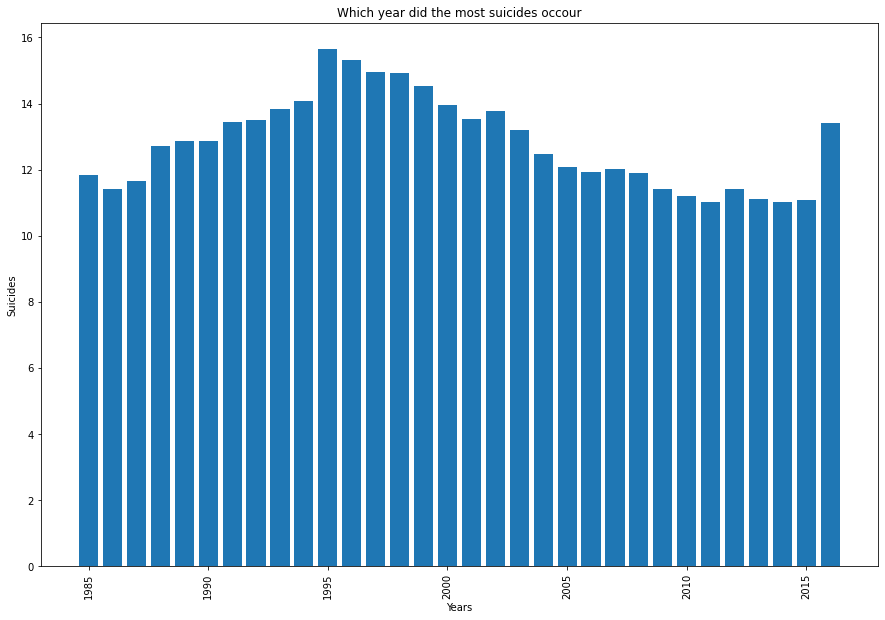

In [9]:
year_list=list(df_who.year.unique())
year_suicide_ratio=[]
for i in year_list:
    a=df_who[df_who['year']==i]
    year_suicide_rate=sum(a['suicides/100k pop'])/len(a)
    year_suicide_ratio.append(year_suicide_rate)
data=pd.DataFrame({'year_list':year_list,'year_suicide_ratio':year_suicide_ratio})
new_index=(data['year_suicide_ratio'].sort_values(ascending=True)).index.values
sorted_data=data.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
plt.bar(sorted_data['year_list'],sorted_data['year_suicide_ratio'])
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.ylabel('Suicides')
plt.title('Which year did the most suicides occour')
plt.show()

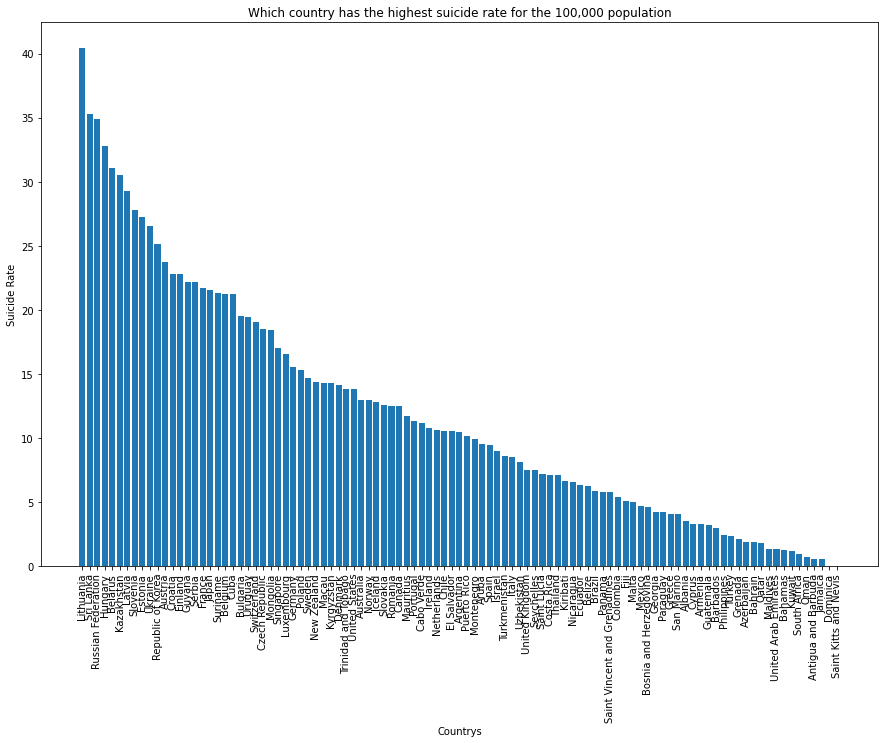

In [10]:


country_list=list(df_who.country.unique())
country_suicide_ratio=[]

for i in country_list:
    a = df_who[df_who['country']==i]
    country_suicide_rate = sum(a['suicides/100k pop'])/len(a)
    country_suicide_ratio.append(country_suicide_rate)

data=pd.DataFrame({'country_list':country_list,'country_suicide_ratio':country_suicide_ratio})
new_index=(data['country_suicide_ratio'].sort_values(ascending=False)).index.values
sorted_data=data.reindex(new_index)


# visualization
plt.figure(figsize=(15,10))
plt.bar(sorted_data['country_list'],sorted_data['country_suicide_ratio'])
plt.xticks(rotation=90)
plt.xlabel('Countrys')
plt.ylabel('Suicide Rate')
plt.title('Which country has the highest suicide rate for the 100,000 population')
plt.show()

In [11]:
df_copy["gdp_year"] = df_copy["gdp_year"].str.replace(",","").astype(float)
df_copy["gdp_year"] = pd.to_numeric(df_copy["gdp_year"])

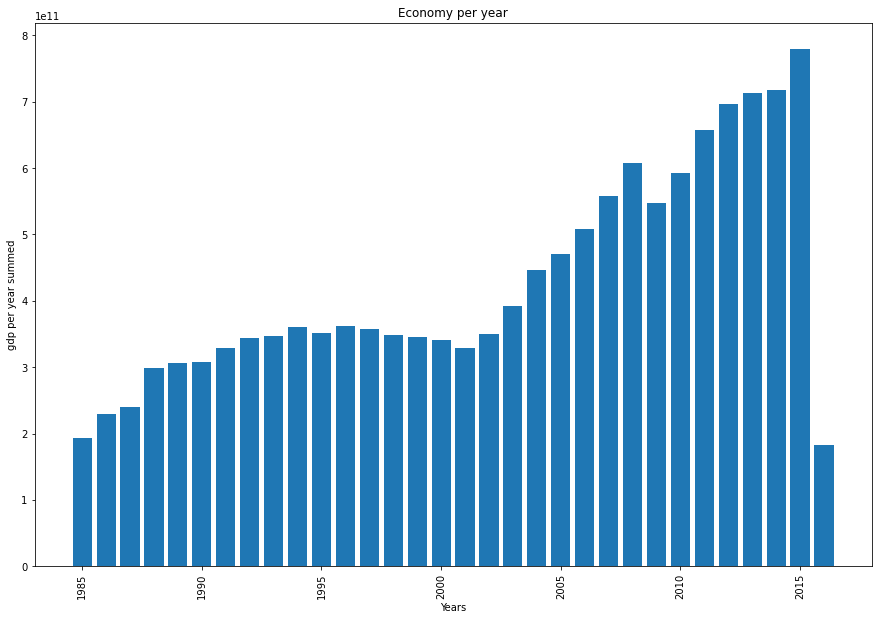

In [12]:
year_list=list(df_who.year.unique())
year_suicide_ratio=[]
for i in year_list:
    a=df_copy[df_copy['year']==i]
    year_suicide_rate=sum(a['gdp_year'])/len(a)
    year_suicide_ratio.append(year_suicide_rate)
data=pd.DataFrame({'year_list':year_list,'year_gdp_ratio':year_suicide_ratio})
new_index=(data['year_gdp_ratio'].sort_values(ascending=True)).index.values
sorted_data=data.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
plt.bar(sorted_data['year_list'],sorted_data['year_gdp_ratio'])
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.ylabel('gdp per year summed')
plt.title('Economy per year')
plt.show()

In [13]:
# df_copy["gdp_per_capita"] = df_copy["gdp_per_capita"].str.replace(",","").astype(float)

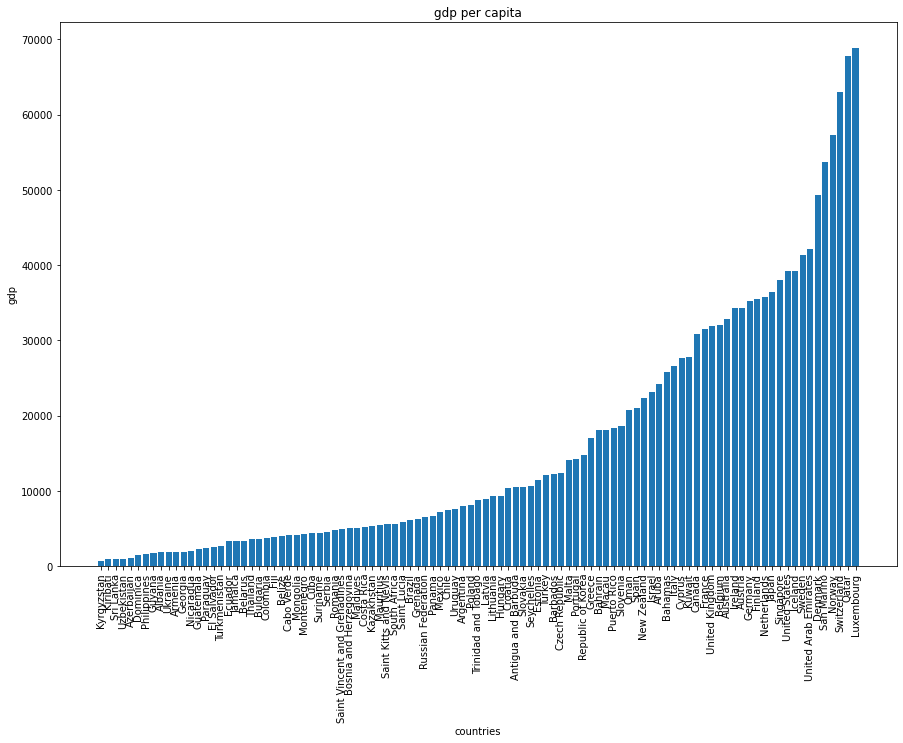

In [14]:
year_list=list(df_who.country.unique())
year_suicide_ratio=[]
for i in year_list:
    a=df_copy[df_copy['country']==i]
    year_suicide_rate=sum(a['gdp_per_capita'])/len(a)
    year_suicide_ratio.append(year_suicide_rate)
data=pd.DataFrame({'year_list':year_list,'year_gdp_ratio':year_suicide_ratio})
new_index=(data['year_gdp_ratio'].sort_values(ascending=True)).index.values
sorted_data=data.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
plt.bar(sorted_data['year_list'],sorted_data['year_gdp_ratio'])
plt.xticks(rotation=90)
plt.xlabel('countries')
plt.ylabel('gdp')
plt.title('gdp per capita')
plt.show()

In [15]:
df_who[['age','suicides/100k pop']].groupby(['age'],as_index=False).mean().sort_values(by='suicides/100k pop',ascending=False)

,age,suicides/100k pop
5,75+ years,23.955409
4,55-74 years,16.155579
2,35-54 years,14.947441
1,25-34 years,12.186885
0,15-24 years,8.947154
3,5-14 years,0.620041


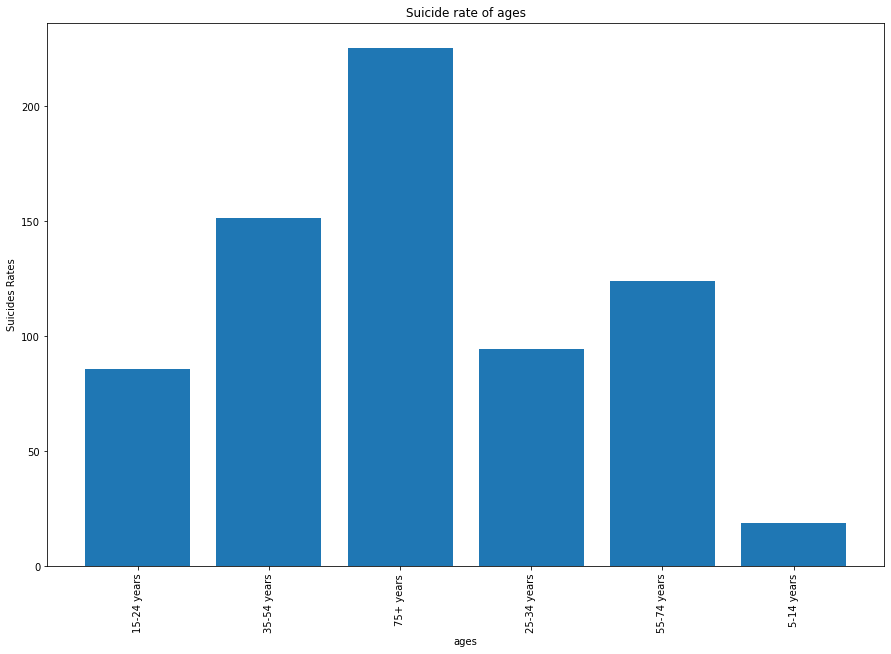

In [16]:
plt.figure(figsize=(15,10))
plt.bar(df_who['age'], df_who['suicides/100k pop'])
plt.xticks(rotation=90)
plt.xlabel("ages")
plt.ylabel("Suicides Rates")
plt.title("Suicide rate of ages")
plt.show()

In [17]:
df_who[['generation','suicides/100k pop']].groupby(['generation'],as_index=False).mean().sort_values(by='suicides/100k pop',ascending=False)

,generation,suicides/100k pop
1,G.I. Generation,23.946378
5,Silent,18.418848
0,Boomers,14.742094
2,Generation X,10.556874
4,Millenials,5.383597
3,Generation Z,0.642299


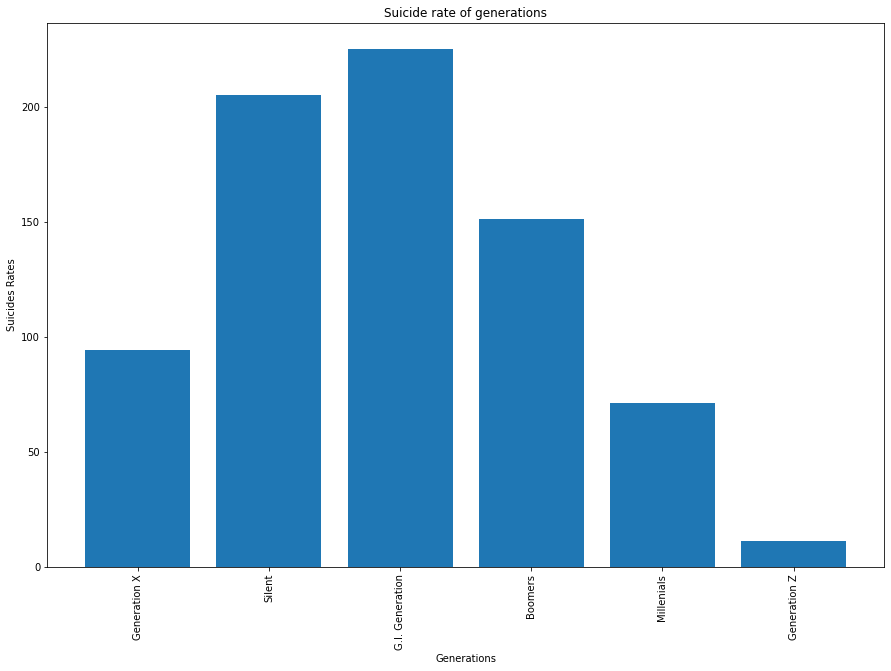

In [18]:
plt.figure(figsize=(15,10))
plt.bar(df_who['generation'], df_who['suicides/100k pop'])
plt.xticks(rotation=90)
plt.xlabel("Generations")
plt.ylabel("Suicides Rates")
plt.title("Suicide rate of generations")
plt.show()